# HDDA. Home Assignment 4

## Obective

4th home assignment is devoted to [Platt scaling](https://en.wikipedia.org/wiki/Platt_scaling) topic. 

Support Vector Machine (SVM) computes a decision function $f(x)$ such that $sign(f(x))$ can be used to predict the label of any test example $x$. Instead of predicting the label, many applications require a posterior class probability $Pr(y = 1|x)$. Platt proposes approximating the posterior by a sigmoid function.

## Plan

Home assignment consists of several parts.

- **SVC Demo**

sklearn [breast cancer](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset) classification by using sklearn Support Vector Classifier posterior probabilities (plug-in Platt scaling)

- **Women’s Clothing E-Commerce dataset**

[Women’s Clothing E-Commerce](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/home) dataset classification by using you implementation of Platt scaling over Support Vector Classifier prediction.

### SVC Demo

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [2]:
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.1,random_state=1337)

Draw train data

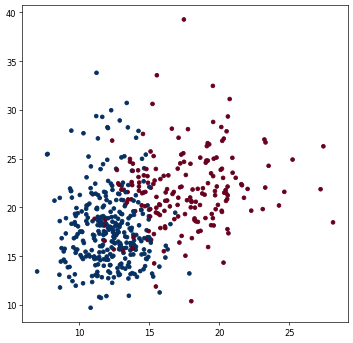

In [3]:
{plt.figure(figsize=(7, 7), dpi=60), plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='RdBu')}
lim = plt.axis()

Create a svm Classifier and tain the model using the training sets

In [4]:
clf = SVC(kernel='linear', probability=True) # Linear Kernel
clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

Get posterior probabilities from SVC

In [5]:
y_pred = [0 if x[0]>0.5 else 1 for x in clf.predict_proba(X_test)]

Check confusion matrix

In [6]:
print(confusion_matrix(y_test, y_pred))

[[20  4]
 [ 0 33]]


Check classification report

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        24
           1       0.89      1.00      0.94        33

    accuracy                           0.93        57
   macro avg       0.95      0.92      0.93        57
weighted avg       0.94      0.93      0.93        57



Draw train (dimmed points), test (solid points), missclassified (yellow points)

{<matplotlib.collections.PathCollection at 0x24db720ce20>,
 <Figure size 300x300 with 1 Axes>}

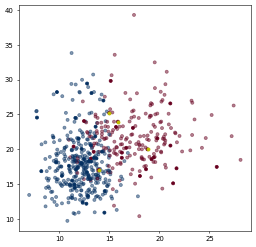

In [11]:
{plt.figure(figsize=(6, 6), dpi=50),
 plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, cmap='RdBu', alpha=0.5),
 plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, cmap='RdBu'),
 plt.scatter(X_test[y_test!=y_pred, 0], X_test[y_test!=y_pred, 1], c='y', s=20)}

### Women’s Clothing E-Commerce dataset

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:
- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.svm import SVC
%matplotlib inline

In [13]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#### 1. Prepare dataset for binary classification. Use two classes rating = 1, rating =  5. Ignore others entries.

In [14]:
# YOUR CODE HERE
X_review = df.loc[(df['Rating'] == 1) | (df['Rating'] == 5)]


In [15]:
df.shape

(23486, 11)

In [16]:
X_review.tail(20)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23444,23444,862,65,Bordeaux for the win,As per usual bordeaux is perfect with this car...,5,1,0,General Petite,Tops,Knits
23446,23446,855,36,Perfect summer tee,This tee is amazing. it's light weight and per...,5,1,3,General,Tops,Knits
23448,23448,1104,39,Soft and warm,I like the contrast of the skirt with the bodi...,5,1,7,General Petite,Dresses,Dresses
23451,23451,1104,26,Classic and sophisticated,I recently purchased this dress at my local re...,5,1,1,General Petite,Dresses,Dresses
23456,23456,1104,35,Flattering and lovely sweater dress,I have been on a search for a dress with sleev...,5,1,3,General Petite,Dresses,Dresses
23457,23457,262,49,Adorable,"These pants are soft, fun print and comfy. the...",5,1,3,General Petite,Intimate,Lounge
23458,23458,862,63,NaN,This is my new favorite sweater. it is lightwe...,5,1,0,General Petite,Tops,Knits
23464,23464,1104,42,Compliments,I wore this dress to work the other day and go...,5,1,3,General Petite,Dresses,Dresses
23465,23465,1078,41,Falls nicely,I bought this dress for work and post work hap...,5,1,0,General,Dresses,Dresses
23467,23467,1104,60,Super flattering!,"I worry when i have an elastic waist, or somet...",5,1,23,General Petite,Dresses,Dresses


In [17]:
X_review.shape

(13973, 11)

In [18]:
y=X_review['Rating']
X_review=X_review.drop('Rating',axis=1)

In [19]:
X_review.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,1,4,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,1,6,General,Tops,Blouses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,1,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,1,0,General,Dresses,Dresses


In [20]:
#Data encoding: to convert categorical features to numberical
from sklearn.preprocessing import LabelEncoder

def ohe_new_features(df, features_names, encoder):
    for feature in features_names:
        name=feature+' New'
        df[name] = encoder.fit_transform(df[feature])
        df.drop(feature, axis=1, inplace=True)
    return df

encoder=LabelEncoder()
f_names = ['Title', 'Review Text', 'Division Name','Department Name','Class Name']
X_review = ohe_new_features(X_review, f_names, encoder)



In [21]:
X_review.head()

,Unnamed: 0,Clothing ID,Age,Recommended IND,Positive Feedback Count,Title New,Review Text New,Division Name New,Department Name New,Class Name New
1,1,1080,34,1,4,7964,7645,0,1,2
3,3,1049,50,1,0,4699,4626,1,0,12
4,4,847,47,1,6,2523,11994,0,4,0
6,6,858,39,1,1,1160,1661,1,4,7
8,8,1077,24,1,0,2472,4102,0,1,2


In [22]:
X_review.isna().sum().sum()

0

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_review)
X_review=scaler.transform(X_review)

In [24]:
X_review=pd.DataFrame(X_review, columns = ['Unnamed','Clothing ID','Age','Recommended IND','Positive Feedback Count','Title New','Review Text New','Division Name New','Department Name New','Class Name New'])

In [25]:
X_review=X_review.drop('Unnamed',axis=1)
X_review.head()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Title New,Review Text New,Division Name New,Department Name New,Class Name New
0,0.789305,-0.762630,0.254662,0.301751,1.324740,0.168403,-0.782725,-0.817737,-0.822076
1,0.641818,0.509775,0.254662,-0.438579,0.036072,-0.584567,0.813220,-1.428407,1.154975
2,-0.319224,0.271199,0.254662,0.671915,-0.822777,1.253088,-0.782725,1.014272,-1.217486
3,-0.266890,-0.365004,0.254662,-0.253496,-1.360742,-1.324069,0.813220,1.014272,0.166450
4,0.775032,-1.557884,0.254662,-0.438579,-0.842906,-0.715258,-0.782725,-0.817737,-0.822076


#### 2. Split you dataset and train SVC with linear kernel

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

svc = SVC(kernel='linear',probability=True)

svc.fit(X_train, y_train) 

y_pred = svc.predict(X_test)

y_proba_test_uncal=svc.decision_function(X_test)


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       246
           5       1.00      1.00      1.00      3946

    accuracy                           1.00      4192
   macro avg       0.98      0.99      0.98      4192
weighted avg       1.00      1.00      1.00      4192



In [28]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print('accuracy: ',accuracy)     
print('misclassification: ',1-accuracy)    

accuracy:  0.9959446564885496
misclassification:  0.004055343511450427


#### 3. Implement Platt scaling

In [29]:
# USE PARAMETERS YOU NEED TO FIT PLATT SCALING
from sklearn.calibration import CalibratedClassifierCV
def PlattScaling(X_train, y_train, X_test):
    global y_pred_proba_cal
    global svc_cal_model
    # YOUR CODE HERE
    probs=[]
    svc_cali = SVC(kernel='linear',class_weight='balanced')
    #default: method='sigmoid', cv=5
    svc_cal_model=CalibratedClassifierCV(svc_cali)
    svc_cal_model.fit(X_train, y_train) 
    y_pred_proba_cal = svc_cal_model.predict_proba(X_test)[:,1]
    #print(y_pred_proba)
    prob_classes=zip(y_test,y_pred_proba_cal)
    for p in prob_classes:
        if p[0]==1:
            probs.append((p[1],1-p[1]))
        elif p[0]==5:
            probs.append((1-p[1],p[1]))
    return probs

4. Classify test and calculate misclassification. Compare it with plug-in svc.predict_proba result.

In [30]:
#0 if prob of first class (1) ==>(worst rating) is >0.5 
#1 else if prob if second class (5) ==>(best rating) is >0.5

y_proba_pred = [0 if x[0]>0.5 else 1 for x in PlattScaling(X_train, y_train, X_test)]

In [31]:
#0 if y is 1 (worst rating) and 1 if y is 5 (best rating)
y_proba_test = [0 if x==1 else 1 for x in y_test]

In [32]:
from sklearn.metrics import accuracy_score
my_accuracy = accuracy_score(y_proba_test, y_proba_pred)
print('accuracy: ',my_accuracy)     
misclassification=1-my_accuracy
print('misclassification: ',misclassification)     


accuracy:  0.9401240458015268
misclassification:  0.05987595419847325


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [34]:
#the SVM with uncalibrated probabilities
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(svc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.991


In [35]:
#the SVM with calibrated probabilities
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(svc_cal_model,  X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.992


5. Represent your results.

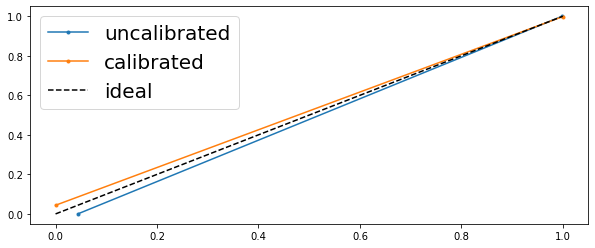

In [36]:
# YOUR CODE HERE
from sklearn.calibration import calibration_curve

fop, mpv = calibration_curve(y_test, y_pred_proba_cal, n_bins=10, normalize=True)
un_fob,un_mpv=calibration_curve(y_test,y_proba_test_uncal, n_bins=10, normalize=True)

plt.figure(figsize=(10,4))
# plot uncalibrated reliability
plt.plot(un_fob, un_mpv, marker='.')

# plot calibrated reliability
plt.plot(mpv, fop, marker='.')

# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--',color='black')

plt.legend(['uncalibrated', 'calibrated', 'ideal'], fontsize=20)

plt.show()
    

In [37]:
'''
the ROC AUC for the SVM model and the no skill classifier that only predicts 0 (worst  ratinng)  for all Rating.
'''

'\nthe ROC AUC for the SVM model and the no skill classifier that only predicts 0 (worst  ratinng)  for all Rating.\n'

In [38]:

yhat = svc.predict(X_test)

No Skill: ROC AUC=0.500
UnCalibrated SVM: ROC AUC=0.991


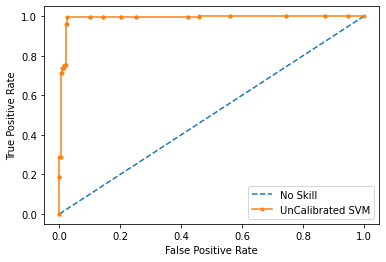

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_proba_test))]
lr_probs = svc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_proba_test, ns_probs)
lr_auc = roc_auc_score(y_proba_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('UnCalibrated SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_proba_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_proba_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='UnCalibrated SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Calibrated SVM: ROC AUC=0.991


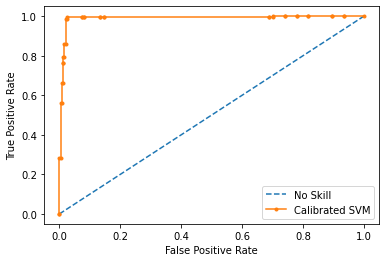

In [40]:
ns_probs = [0 for _ in range(len(y_proba_test))]
lr_probs = svc_cal_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_proba_test, ns_probs)
lr_auc = roc_auc_score(y_proba_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Calibrated SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_proba_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_proba_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Calibrated SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [41]:
c=0
[c:=c+1 for x in y_proba_test if x==1]
c

3946

In [42]:

y_proba_hat = [0 if x==1 else 1 for x in yhat]


UnCalibrated SVM: f1=0.998 auc=0.999


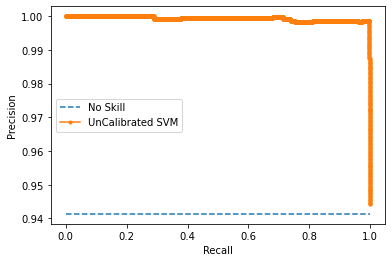

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = svc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_proba_test, lr_probs)
lr_f1, lr_auc = f1_score(y_proba_test, y_proba_hat), auc(lr_recall, lr_precision)
# summarize scores
print('UnCalibrated SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = c / len(y_proba_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='UnCalibrated SVM')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [44]:
yhat_cal = svc_cal_model.predict(X_test)
y_proba_hat_cal = [0 if x==1 else 1 for x in yhat]


Calibrated SVM: f1=0.998 auc=0.999


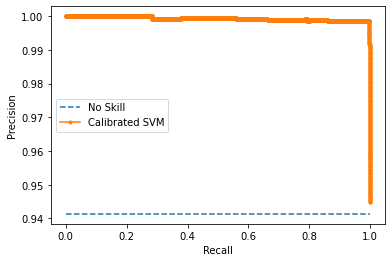

In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
lr_probs = svc_cal_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_proba_test, lr_probs)
lr_f1, lr_auc = f1_score(y_proba_test, y_proba_hat_cal), auc(lr_recall, lr_precision)
# summarize scores
print('Calibrated SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = c / len(y_proba_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Calibrated SVM')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()